<a href="https://colab.research.google.com/github/eyuuab/Frame_level_video_forgery_detaction/blob/main/frame_detaction.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


tampered_video_path = '/content/Inpaint2.mp4'  # Tampered video
real_video_path = '/content/ped.mp4'          # Real video

##  analyze video
def analyze_video(video_path, label):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return None

    prev_frame = None
    frame_differences = []
    threshold = 30

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        ## Convert frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        if prev_frame is not None:
            ## Calculate absolute difference between cur and prev frame
            diff = cv2.absdiff(gray, prev_frame)
            non_zero = np.count_nonzero(diff)  # Count non-zero pixels
            frame_differences.append(non_zero)

            ## Flag potential tampering
            if non_zero < threshold:
                print(f"{label}: Potential duplicate/freeze at frame: {int(cap.get(cv2.CAP_PROP_POS_FRAMES))}")

        prev_frame = gray

    cap.release()
    return frame_differences


tampered_differences = analyze_video(tampered_video_path, "Tampered Video")
real_differences = analyze_video(real_video_path, "Real Video")

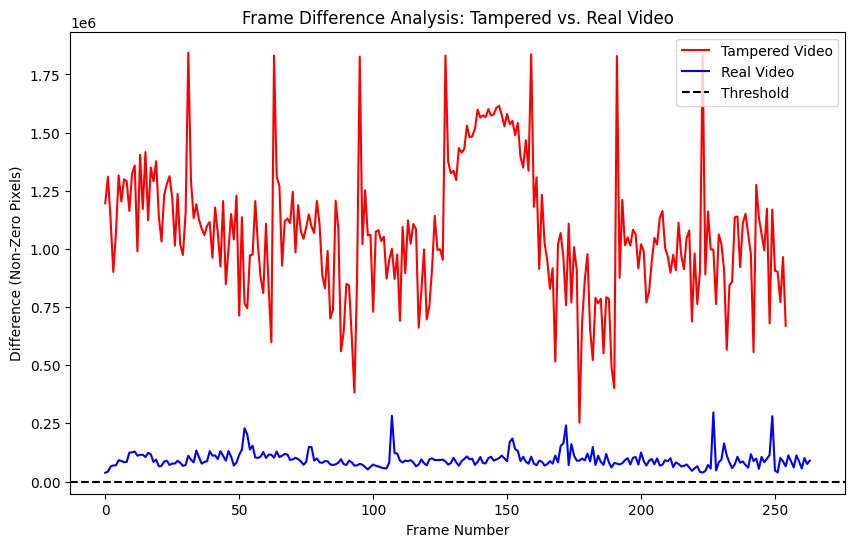

In [ ]:
## Plot frame differences for both videos
plt.figure(figsize=(10, 6))
plt.plot(tampered_differences, label="Tampered Video", color='red')
plt.plot(real_differences, label="Real Video", color='blue')
plt.axhline(y=threshold, color='black', linestyle='--', label="Threshold")
plt.xlabel("Frame Number")
plt.ylabel("Difference (Non-Zero Pixels)")
plt.title("Frame Difference Analysis: Tampered vs. Real Video")
plt.legend()
plt.show()

In [ ]:
## Calculate statistics
tampered_mean = np.mean(tampered_differences)
tampered_std = np.std(tampered_differences)

real_mean = np.mean(real_differences)
real_std = np.std(real_differences)

print(f"Tampered Video - Mean Difference: {tampered_mean}, Std Dev: {tampered_std}")
print(f"Real Video - Mean Difference: {real_mean}, Std Dev: {real_std}")

Tampered Video - Mean Difference: 1075084.7647058824, Std Dev: 282546.84696767025
Real Video - Mean Difference: 94345.91666666667, Std Dev: 34960.41477840193
